# Creating a sierpinski triangle

A sierpinski triangle is

Saw something on tiktok on a cheaky way to construct a sierpinski triangle. It might be computationally efficient. But it's very simple to understand.

Imagine an equillateral triangle with side length l and points a,b,c

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# the length of the equillateral triangles sides. 
# I think larger should help computations, by avoiding limits of computer byte size
l = 1000;

# let's get a triangle going in numpy and matplotlib
# the first point is easy, it's just origin.
a = np.array([0, 0])
# second point is on y=0 and x=l
b = np.array([l, 0])

To calculate the position of the top of the triangle, point $c$, we need pythag's theorom.

$$\begin{align}
a^2+b^2&=c^2 \\
(l/2)^2+b^2&=(l)^2 \\
b^2 &= (l)^2-(l/2)^2 \\
b &= \sqrt{l^2-(l/2)^2)}
\end{align}$$

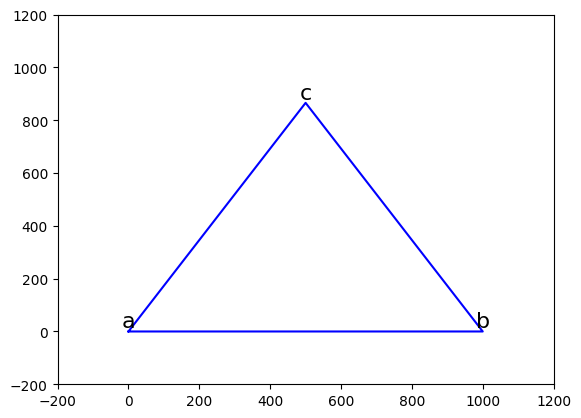

In [158]:
# third point requires pythag's theorem.
c = np.array([l/2, np.sqrt((l)**2 - (l/2)**2)])
# draw the starting triangle
x_init = np.array([a[0], b[0], c[0],a[0]])
y_init = np.array([a[1], b[1], c[1],a[1]])

# plot the triangle
plt.plot(x_init,y_init,'b-')
# set the x and y axis limits
plt.xlim(-l*0.2, l*1.2)
plt.ylim(-l*0.2, l*1.2)
# label the points
pnts = ['a','b','c']
for i in range(0,3):
     plt.text(x_init[i],y_init[i],pnts[i],ha='center', va='bottom',fontsize=16)

Now pick a random point in that triangle

Note. This is not trivial. Picking a random x and y between the outer limits of the width and height of the triangle will not always result in a point inside the triangle. Some will be high to the left or right (but still below the top height of the triangle. So when we pick a random x, we'll reset the limits of the y range before drawing a random number.

825.8620594654445 149.48492650494893


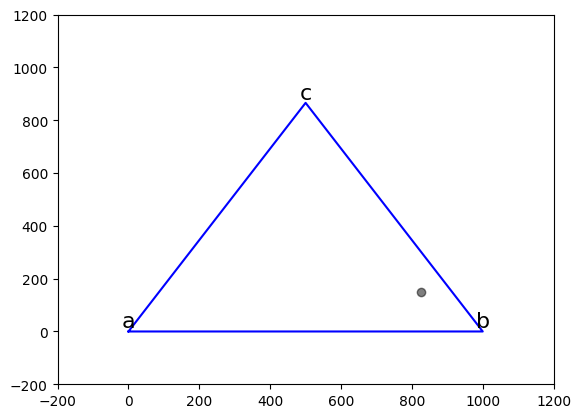

In [159]:
### plot the triangle
plt.plot(x_init,y_init,'b-')
# set the x and y axis limits
plt.xlim(-l*0.2, l*1.2)
plt.ylim(-l*0.2, l*1.2)
# label the points
pnts = ['a','b','c']
for i in range(0,3):
     plt.text(x_init[i],y_init[i],pnts[i],ha='center', va='bottom',fontsize=16)

# select a random starting x        
rx = np.random.uniform(0,l)
# select a random starting y
# to calculate the triangle at this x value, we could do some trig. 
# But I also know the equation for the line from 0 to l/2 and l/2 to l
# calculate the slope of a to c.
m = c[1]/c[0]
if rx<=l/2:
    ry = np.random.uniform(0,m*rx)
else:
    ry = np.random.uniform(0,-m*(rx-l/2)+c[1])
print(rx,ry)      

plt.scatter(rx,ry,color='black',alpha=0.5);

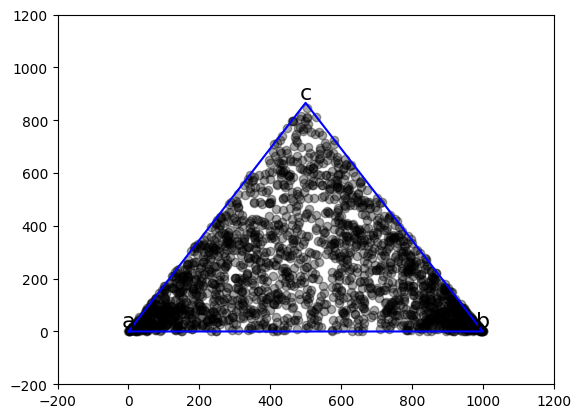

In [160]:
#Let's test the randomness quick
max_iter = 2000

### plot the triangle
plt.plot(x_init,y_init,'b-')
# set the x and y axis limits
plt.xlim(-l*0.2, l*1.2)
plt.ylim(-l*0.2, l*1.2)
# label the points
pnts = ['a','b','c']
for i in range(0,3):
     plt.text(x_init[i],y_init[i],pnts[i],ha='center', va='bottom',fontsize=16)

out = np.zeros([max_iter,2])        
        
for k in range(0,max_iter-1):        
        
    # select a random starting x        
    rx = np.random.uniform(0,l)
    # select a random starting y
    # to calculate the triangle at this x value, we could do some trig. 
    # But I also know the equation for the line from 0 to l/2 and l/2 to l
    # calculate the slope of a to c.
    m = c[1]/c[0]
    if rx<=l/2:
        ry = np.random.uniform(0,m*rx)
    else:
        ry = np.random.uniform(0,-m*(rx-l/2)+c[1]) 
        
    out[k,:] = [rx,ry]    

plt.scatter(out[:,0],out[:,1],color='black',alpha=0.35);


so clearly our random triangle point picker is not perfectly random. But it actually doesn't matter for our purposes really. (I think the real way to randomly pick a point is to start in the middle, pick a random angle, and then pick a random point in between the center and the wall at that angle.)

Moving ON!

We have our random x and y inside the triangle. Now select a random vertex ($a,b,c$) and move half way to that point.

In [231]:
# pick a random vertex
vi = np.random.randint(0,2+1)
# find its location
v = np.array([x_init[vi],y_init[vi]])
# split the difference between the random point and the vertex
newp = np.array(v[0]